In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [2]:
def objective(x):
    a=x[0]
    b=x[1]
    c=x[2]
    return 4*b+c-4*a
def constraint1(x):
    a=x[0]
    b=x[1]
    c=x[2]
    return 14*a*(b-2*a)**4-1.5*(b**2)*(A**2)-1.5*(b+c-a)*a*b*(A**2)-1.5*a*(b**2)*(B**2)-0.75*(b+c-a)*(A**4)-0.125*b*(A**2)*(B**2)
def constraint2(x):
    a=x[0]
    b=x[1]
    c=x[2]
    return 6*a*(b-2*a)**2-1.5*b*(A**2)-0.75*a*(B**2)
def constraint3(x):
    a=x[0]
    b=x[1]
    c=x[2]
    return 4*a*(b-2*a)**3-0.25*(b+c-a)*(A**2)-3*(a**2)/((b-2*a)*C)-2*(b-2*a)*(B**2)
def constraint4(x):
    return x[1]-2*x[0]-0.0005

In [3]:
x0=[1, 3, 1]

b=(0.1, None)
bnds=(b, b, b)
con1={'type':'ineq', 'fun': constraint1}
con2={'type':'ineq', 'fun': constraint2}
con3={'type':'ineq', 'fun': constraint3}
con4={'type':'ineq', 'fun': constraint4}
cons=[con1, con2, con3, con4]

In [9]:
C=100000
lista=range(1, 30)
val_opt=100
sol_opt=[0, 0, 0]
C1=0
C2=0
i=1
x_axis=[]
y_axis=[]
for A in lista:
    for B in lista:
        sol=minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
        print("Solución problema de optimización para:", A, B)
        print("Valor problema:", sol.fun)
        print("Valor parámetros:", sol.x)
        x_axis.append(i)
        y_axis.append(sol.fun)
        if sol.fun<val_opt and sol.fun>0:
            val_opt=sol.fun
            sol_opt=sol.x
            C1=A
            C2=B
        i=i+1

Solución problema de optimización para: 1 1
Valor problema: 6.550830939768153
Valor parámetros: [0.40001304 2.01272078 0.1       ]
Solución problema de optimización para: 1 2
Valor problema: 9.77636195197561
Valor parámetros: [0.79268594 3.21177643 0.1       ]
Solución problema de optimización para: 1 3
Valor problema: 8.168352034421325
Valor parámetros: [1.00771243 3.02480044 0.1       ]
Solución problema de optimización para: 1 4
Valor problema: 0.09999999999999992
Valor parámetros: [0.1 0.1 0.1]
Solución problema de optimización para: 1 5
Valor problema: nan
Valor parámetros: [nan nan nan]
Solución problema de optimización para: 1 6
Valor problema: 0.5019882326689278
Valor parámetros: [0.1        0.20049706 0.1       ]
Solución problema de optimización para: 1 7
Valor problema: 0.5019903074326024
Valor parámetros: [0.1        0.20049758 0.1       ]
Solución problema de optimización para: 1 8
Valor problema: nan
Valor parámetros: [nan nan nan]
Solución problema de optimización para: 

In [14]:
print("El valor del problema de minimización es:", val_opt)
print("Solución del problema: a=%s, b=%s, c=%s" %tuple(sol.x))
print("Las constantes del problema son: C1=1/%s, C2=1/%s, C3=C" %(C1, C2))

El valor del problema de minimización es: 0.09960193002484108
Solución del problema: a=0.09999999999999998, b=0.20050000000170076, c=0.10000000000007314
Las constantes del problema son: C1=1/10, C2=1/4, C3=C


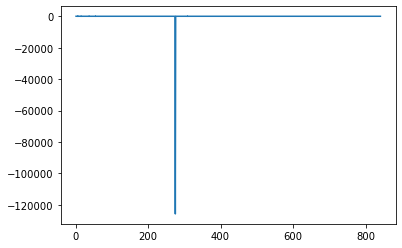

In [13]:
plt.plot(x_axis, y_axis)

In [16]:
C=10000
A=1
B=1
sol=minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol)
print(constraint1(sol.x))
print(constraint2(sol.x))
print(constraint3(sol.x))
print(constraint4(sol.x))
A=1
B=1
sol_2=minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol_2)

     fun: 6.550852086149189
     jac: array([-4.,  4.,  1.])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 8
    njev: 7
  status: 0
 success: True
       x: array([0.40001796, 2.01273098, 0.1       ])
2.965019896272736e-10
0.2105588804054812
5.841593875288709e-11
1.2121950638864714
     fun: 6.550852086149189
     jac: array([-4.,  4.,  1.])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 8
    njev: 7
  status: 0
 success: True
       x: array([0.40001796, 2.01273098, 0.1       ])
